In [3]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *

In [2]:
# 1 optimiser
np.random.seed(134)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': torch.tensor([[90.743], [112.21]]).cuda(),
           'std': torch.ones((2,)).cuda() * 30, 
           'tol': 1e-2, 
           'adjust_func': inner_opt, 
           'record': True, 
           'max_iter': 50,
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()

distance domain, codomain:  2.0626768481233856e-06 3.147125244140625e-05


In [45]:
ana= post_analysis_single(stats)
#ana.plot_distance()

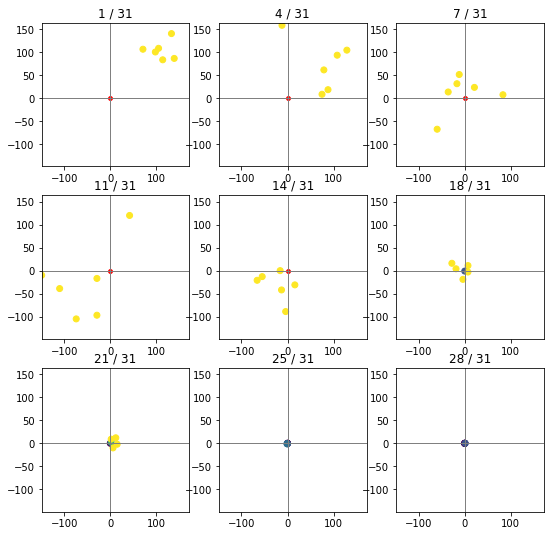

In [46]:
ana.plot_moving_cluster()

In [25]:
argss = stats['arg']
valss = stats['val'].mean(axis=1)

dist = argss.reshape(-1, 1, 6, 2) - argss.reshape(-1, 6, 1, 2)
distn = np.linalg.norm(dist, axis=(3)).round(2)

mask = np.triu(np.ones((6,6)), 0)

In [ ]:
for i, mat in enumerate(distn):
    print(i)
    print(mat.round(2))
    print('\n')

/home/qiu/miniconda3/envs/lowCuda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


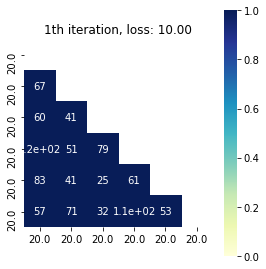

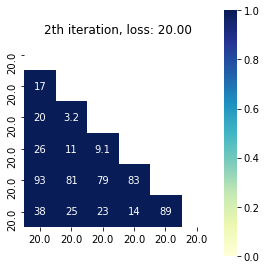

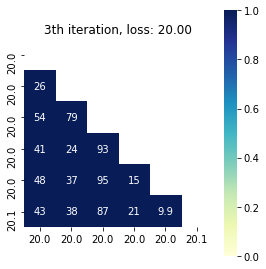

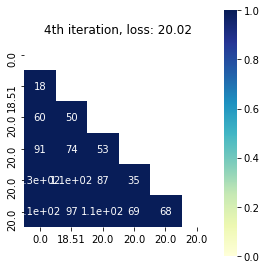

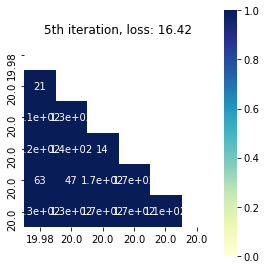

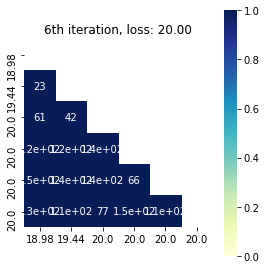

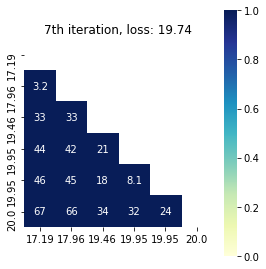

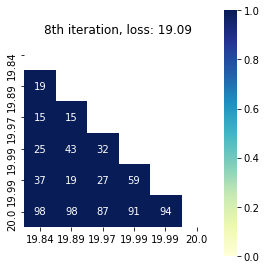

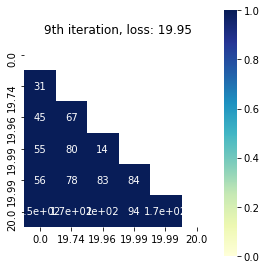

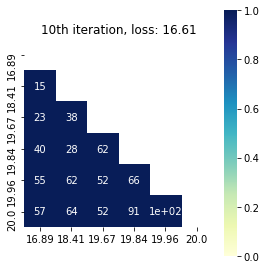

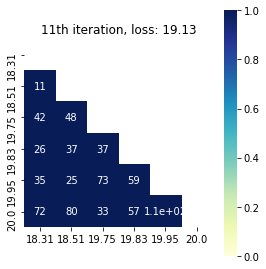

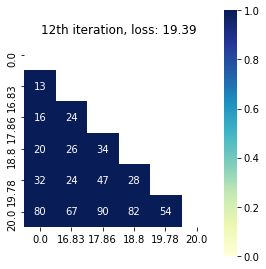

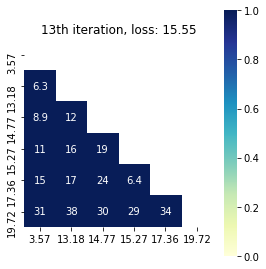

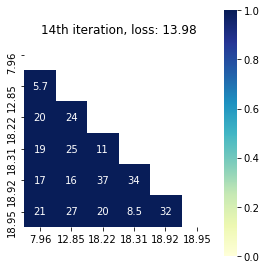

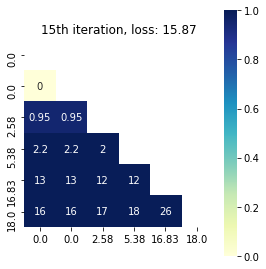

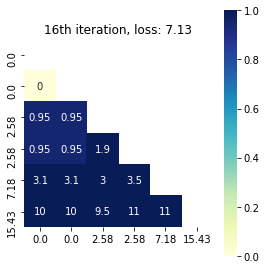

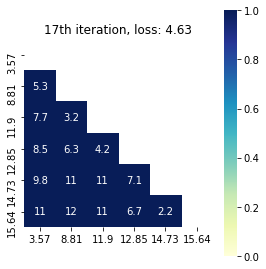

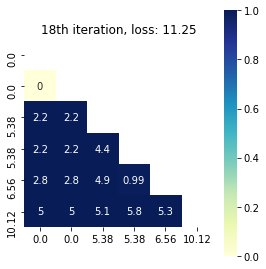

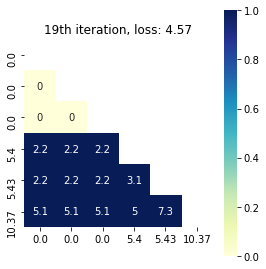

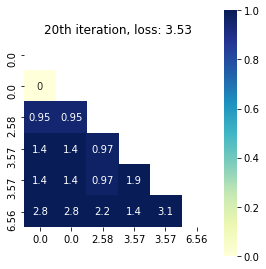

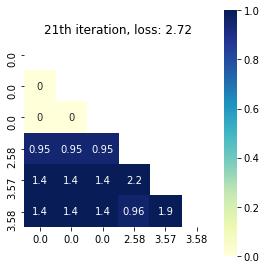

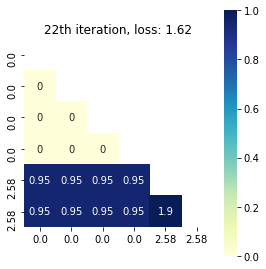

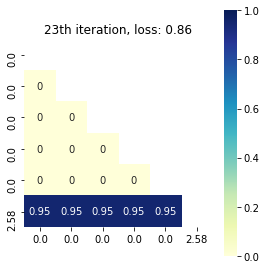

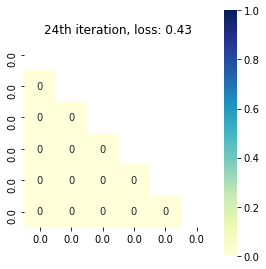

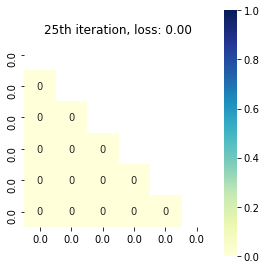

In [30]:
n = int(argss.shape[0])
for i in range(n-1):
    figure, ax = plt.subplots(figsize=(4, 4))
    figure.tight_layout()
    ax.set_title("%dth iteration, loss: %.2f"%(i+1, valss[i].round(2)))
    axsns = sns.heatmap(distn[i+1], mask=mask, vmin=0, vmax=1, ax=ax, annot=True, square=True,  cmap="YlGnBu")
    axsns.set_xticklabels(stats['val'][i+1].round(2))
    axsns.set_yticklabels(stats['val'][i+1].round(2))

In [5]:
# 1 optimiser
np.random.seed(234)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es(dim=8)
optParas ={'x0': torch.randn(8).cuda()*10,
           'std': torch.ones((8,)).cuda() * 3, 
           'tol': 1e-2, 
           'adjust_func': inner_opt, 
           'record': True, 
           'max_iter': 50,
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley(dim=8)

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()



*******starting optimisation from intitial mean:  [ -0.3605929   7.6482944 -16.132734    3.8555942  18.686398   -9.983135
  -1.9088221  11.0715   ]
iter:  1
loss:  15.654661178588867
latent:  [  3.0630922   1.0416554 -10.030848    3.0370667  13.951032   -2.972635
   2.9524574  11.014961 ]


iter:  2
loss:  14.223307609558105
latent:  [  4.990852   -0.9982037 -11.977857    3.9902377   6.985668   -3.990477
  -2.9942324   6.9841285]


iter:  3
loss:  12.632258415222168
latent:  [ 9.9698585e-01  2.9912565e+00 -5.9825459e+00  1.9937043e+00
  6.9782848e+00  9.3467534e-06 -9.9690068e-01  9.9679680e+00]


iter:  4
loss:  12.264148712158203
latent:  [ 5.9812870e+00  2.2407807e-04 -7.9745569e+00  1.9945115e+00
  7.9746780e+00 -1.8489733e-04  2.9910903e+00  1.9939427e+00]


iter:  5
loss:  0.0005273818969726562
latent:  [ 1.7832979e-05  2.9350340e-05 -1.0156829e-05 -2.5689020e-05
  2.7826856e-05 -2.8357390e-05 -3.7664395e-06 -2.2012064e-06]


iter:  6
loss:  8.666345596313477
latent:  [-1.98361

In [8]:
stats['arg'].shape

(27, 10, 8)

In [9]:
argss = stats['arg']
valss = stats['val'].mean(axis=1)

dist = argss.reshape(-1, 1, 10, 8) - argss.reshape(-1, 10, 1, 8)
distn = np.linalg.norm(dist, axis=(3)).round(2)

mask = np.triu(np.ones((10,10)), 0)

/home/qiu/miniconda3/envs/lowCuda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


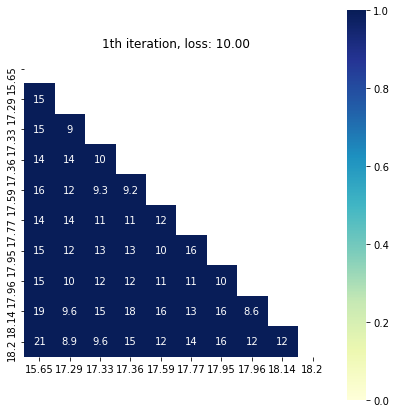

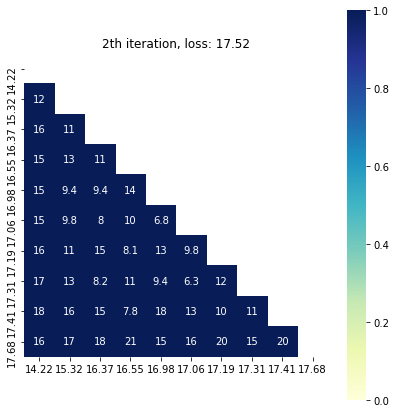

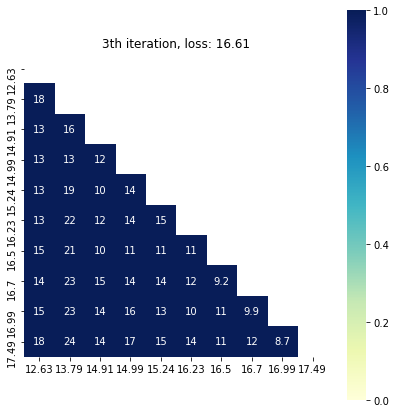

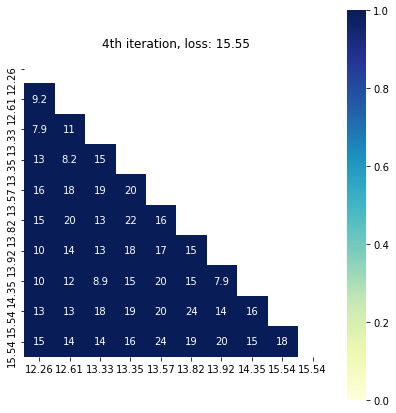

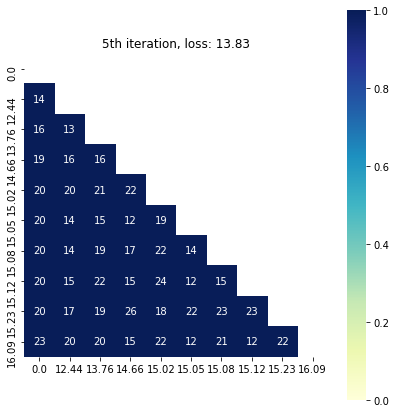

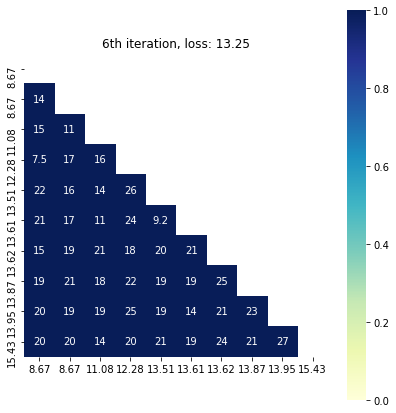

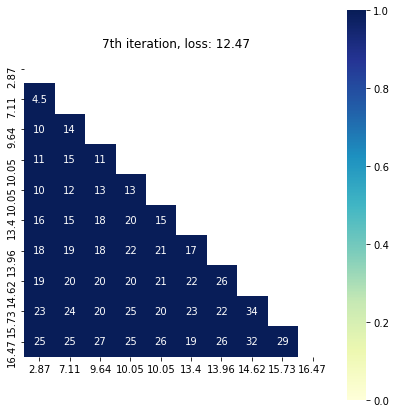

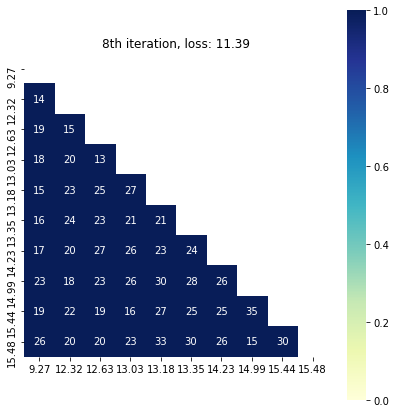

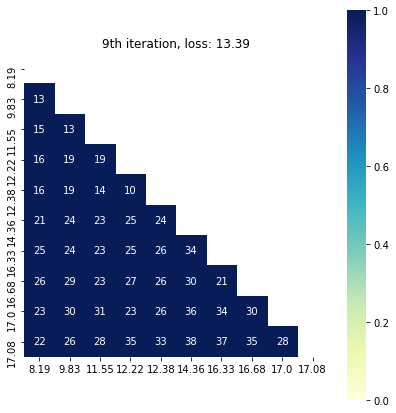

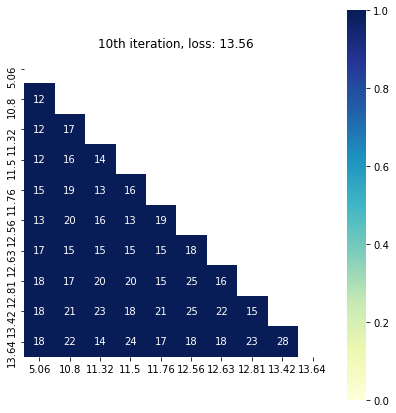

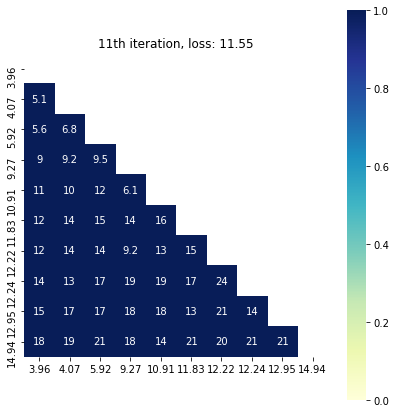

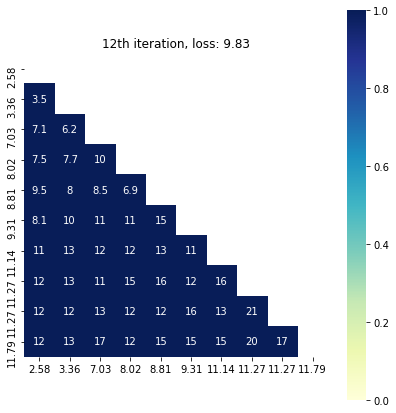

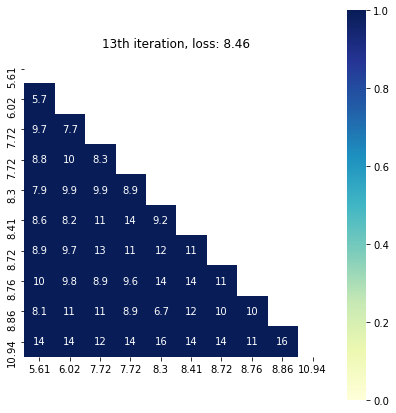

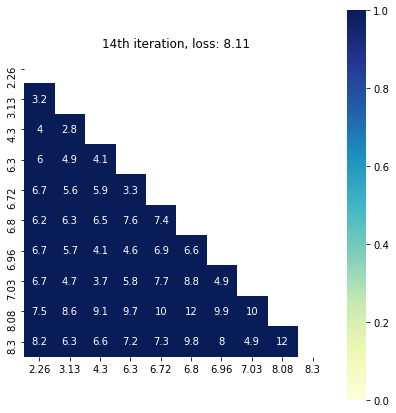

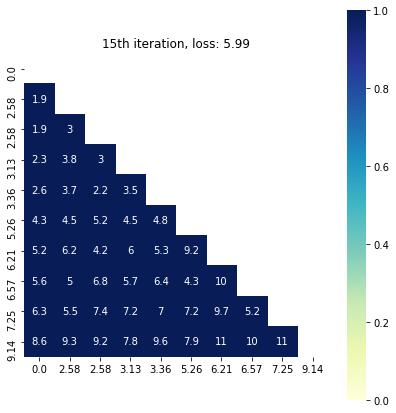

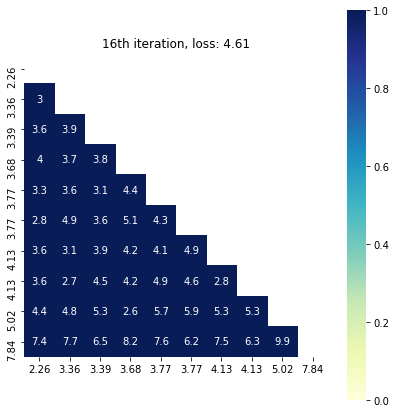

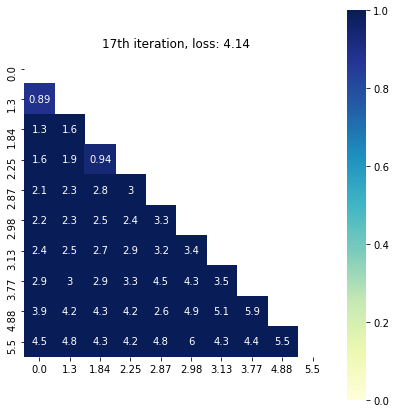

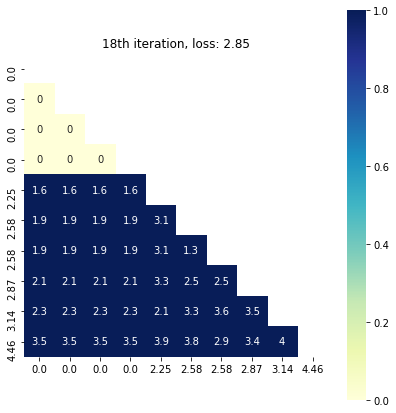

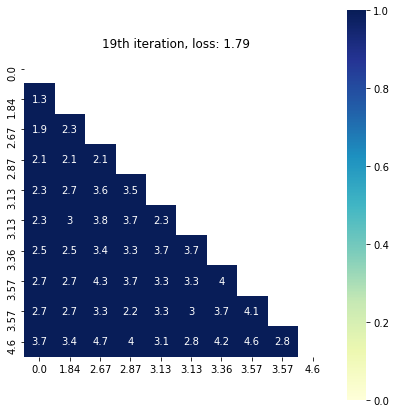

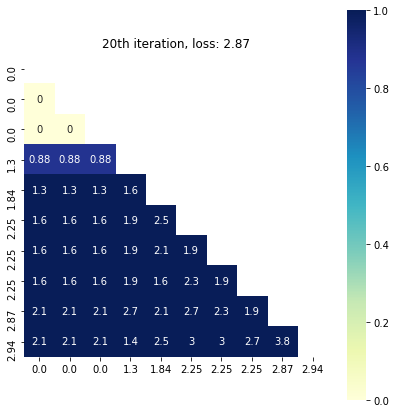

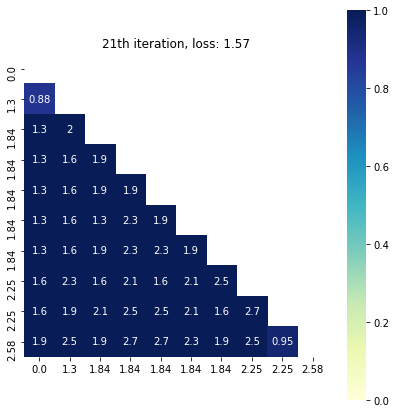

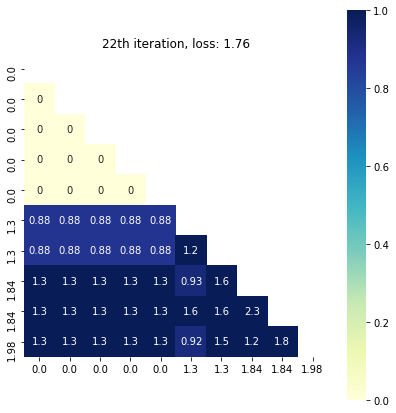

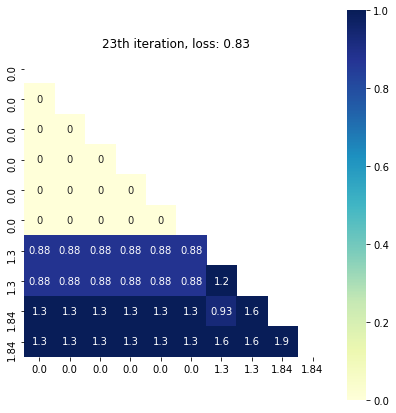

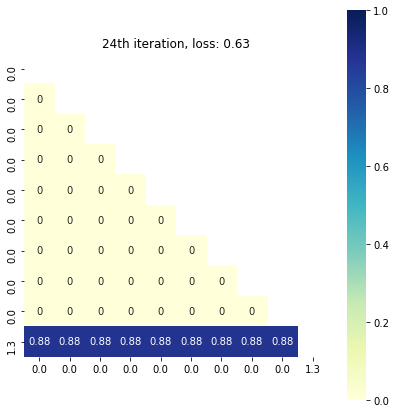

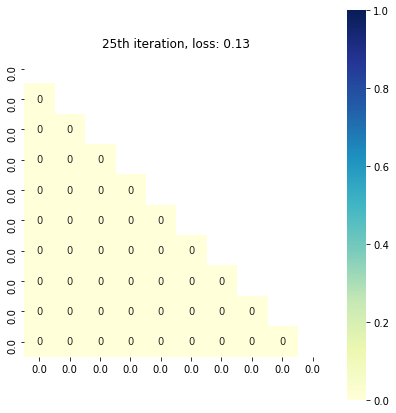

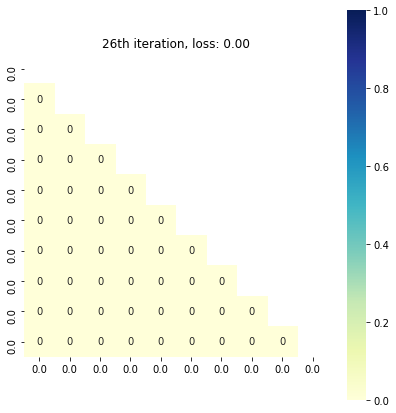

In [10]:
n = int(argss.shape[0])
for i in range(n-1):
    figure, ax = plt.subplots(figsize=(6, 6))
    figure.tight_layout()
    ax.set_title("%dth iteration, loss: %.2f"%(i+1, valss[i].round(2)))
    axsns = sns.heatmap(distn[i+1], mask=mask, vmin=0, vmax=1, ax=ax, annot=True, square=True,  cmap="YlGnBu")
    axsns.set_xticklabels(stats['val'][i+1].round(2))
    axsns.set_yticklabels(stats['val'][i+1].round(2))

In [ ]:
# 1 optimiser
np.random.seed(234)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es(dim=8)
optParas ={'x0': torch.randn(8).cuda()*100,
           'std': torch.ones((8,)).cuda() * 3, 
           'tol': 1e-2, 
           'adjust_func': inner_opt, 
           'record': True, 
           'max_iter': 50,
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley(dim=8)

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()

In [13]:
argss = stats['arg']
valss = stats['val'].mean(axis=1)

dist = argss.reshape(-1, 1, 10, 8) - argss.reshape(-1, 10, 1, 8)
distn = np.linalg.norm(dist, axis=(3)).round(2)

mask = np.triu(np.ones((10,10)), 0)

In [17]:
distn[34]

array([[ 0.  ,  9.69,  8.25, 10.3 ,  8.24,  9.7 ,  9.9 , 10.58, 11.71,
         8.31],
       [ 9.69,  0.  , 10.  , 10.67,  6.63, 15.94,  7.61, 16.  ,  8.43,
         8.78],
       [ 8.25, 10.  ,  0.  , 10.4 , 10.  , 13.19,  9.28, 11.4 , 10.25,
         7.94],
       [10.3 , 10.67, 10.4 ,  0.  ,  8.12, 13.93,  8.12, 13.19, 12.29,
         8.19],
       [ 8.24,  6.63, 10.  ,  8.12,  0.  , 11.31,  6.63, 11.22,  9.44,
         7.81],
       [ 9.7 , 15.94, 13.19, 13.93, 11.31,  0.  , 14.83,  6.  , 13.83,
        11.36],
       [ 9.9 ,  7.61,  9.28,  8.12,  6.63, 14.83,  0.  , 13.11, 12.69,
         7.42],
       [10.58, 16.  , 11.4 , 13.19, 11.22,  6.  , 13.11,  0.  , 15.  ,
        10.44],
       [11.71,  8.43, 10.25, 12.29,  9.44, 13.83, 12.69, 15.  ,  0.  ,
         9.28],
       [ 8.31,  8.78,  7.94,  8.19,  7.81, 11.36,  7.42, 10.44,  9.28,
         0.  ]], dtype=float32)

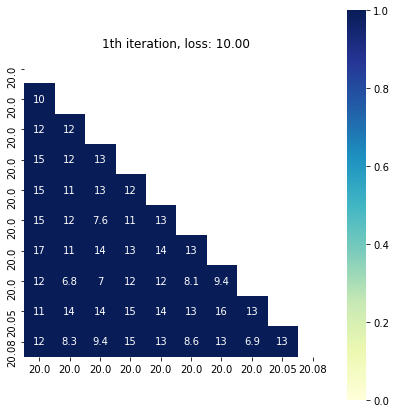

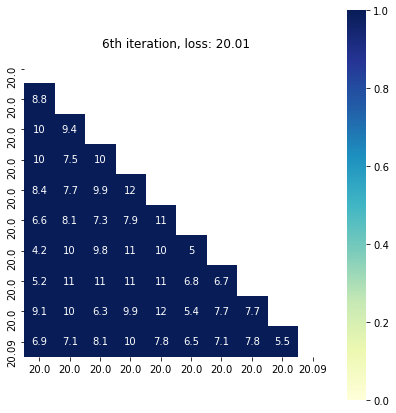

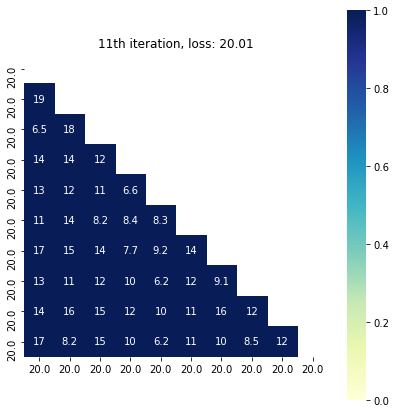

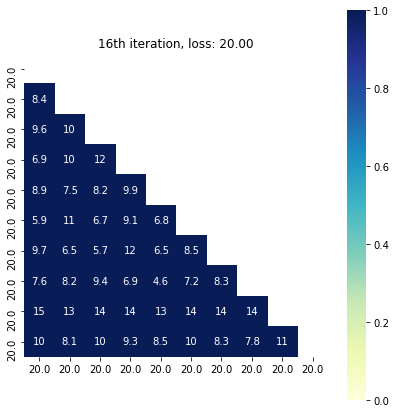

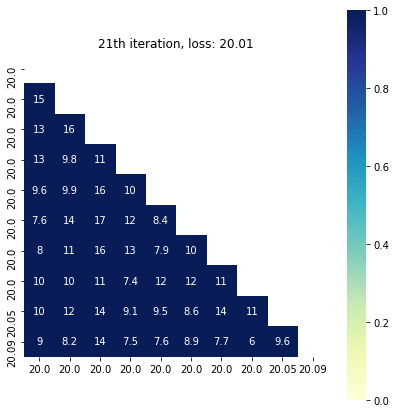

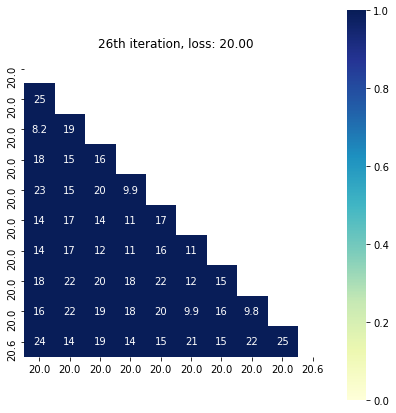

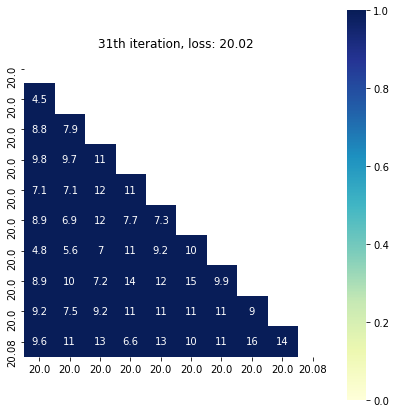

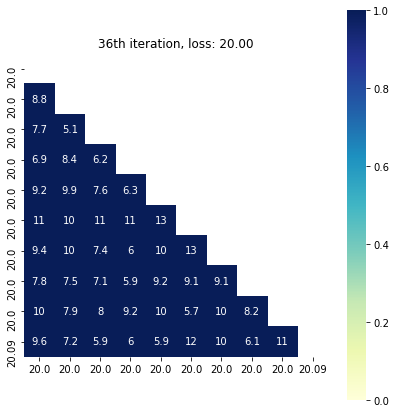

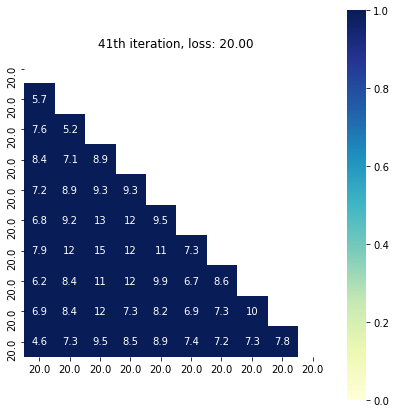

In [19]:
n = int(argss.shape[0]/5)
for i in range(n-1):
    figure, ax = plt.subplots(figsize=(6, 6))
    figure.tight_layout()
    ax.set_title("%dth iteration, loss: %.2f"%(i*5+1, valss[i*5].round(2)))
    axsns = sns.heatmap(distn[i*5+1], mask=mask, vmin=0, vmax=1, ax=ax, annot=True, square=True,  cmap="YlGnBu")
    axsns.set_xticklabels(stats['val'][i*5+1].round(2))
    axsns.set_yticklabels(stats['val'][i*5+1].round(2))

In [18]:
# 1 optimiser
np.random.seed(294)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 1000,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es(dim=2)
optParas ={'x0': torch.randn(2).cuda()*10,
           'std': torch.ones((2,)).cuda() * 30, 
           'tol': 1e-2, 
           'adjust_func': inner_opt, 
           'record': True, 
           'max_iter': 50,
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = eggholder()

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()



*******starting optimisation from intitial mean:  [ 4.1150866 -1.4232379]
iter:  1
loss:  850.4627075195312
latent:  [-45.99691   37.980896]


iter:  2
loss:  850.450927734375
latent:  [-46.39307   38.274437]


iter:  3
loss:  850.4559936523438
latent:  [-46.21108  37.89306]


iter:  4
loss:  850.4605102539062
latent:  [-46.093067  37.87981 ]


iter:  5
loss:  850.4630737304688
latent:  [-45.990486  37.98076 ]


iter:  6
loss:  850.4627075195312
latent:  [-45.996338  37.981808]


iter:  7
loss:  850.451904296875
latent:  [-46.625572  38.01527 ]


iter:  8
loss:  850.4656982421875
latent:  [-45.936726  38.015823]


iter:  9
loss:  850.457275390625
latent:  [-46.765785  38.313206]


iter:  10
loss:  850.4515380859375
latent:  [-46.347744  37.961487]


iter:  11
loss:  850.451171875
latent:  [-46.504215  37.963535]


iter:  12
loss:  850.4521484375
latent:  [-46.434494  37.916332]


iter:  13
loss:  850.4523315429688
latent:  [-46.574104  37.94788 ]


iter:  14
loss:  850.4522094726562


In [20]:
argss = stats['arg']
valss = stats['val'].mean(axis=1)

dist = argss.reshape(-1, 1, 6, 2) - argss.reshape(-1, 6, 1, 2)
distn = np.linalg.norm(dist, axis=(3)).round(2)

mask = np.triu(np.ones((6,6)), 0)

/home/qiu/miniconda3/envs/lowCuda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


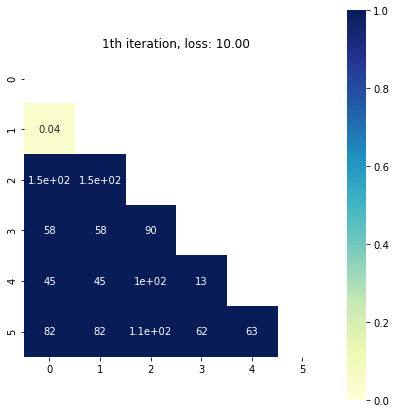

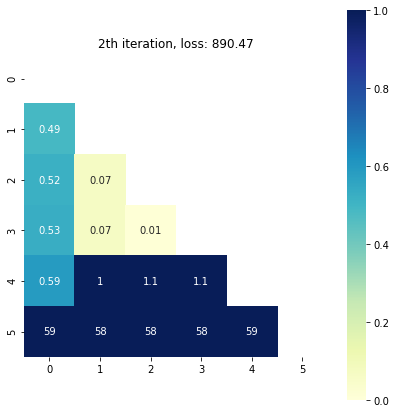

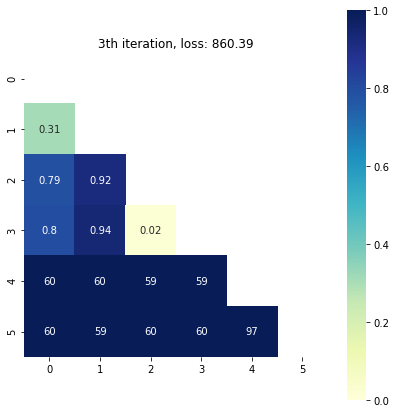

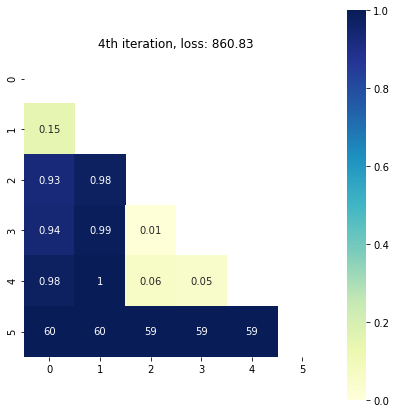

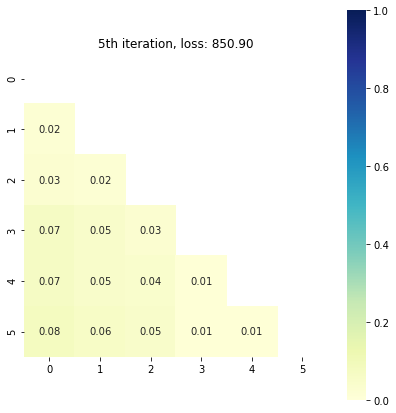

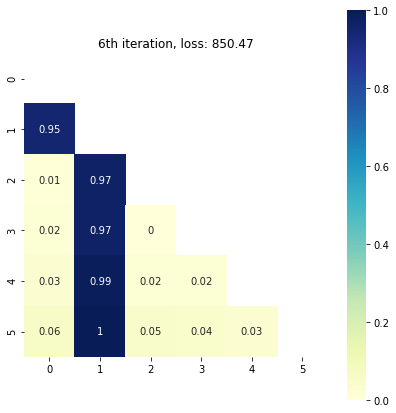

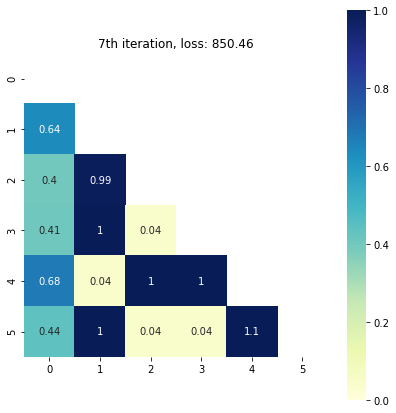

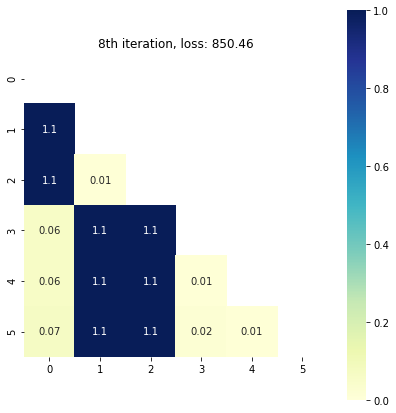

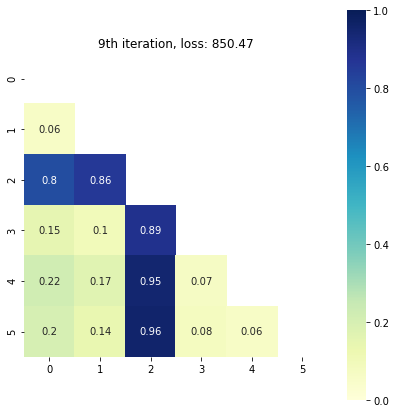

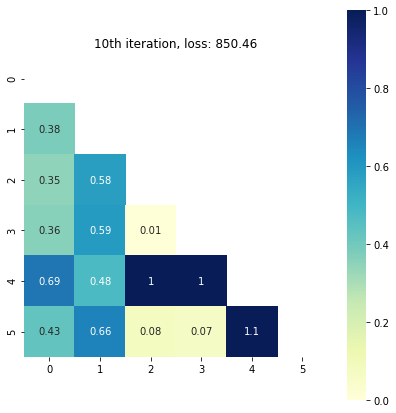

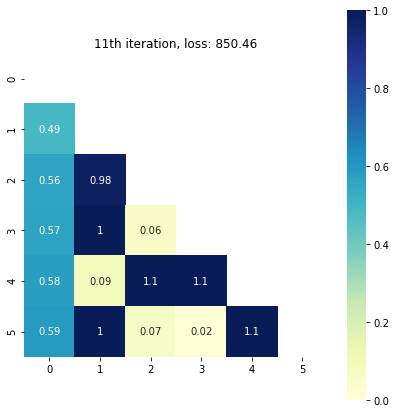

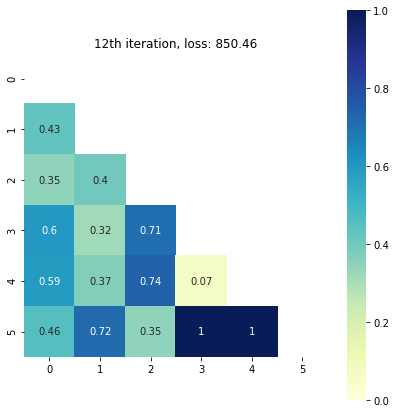

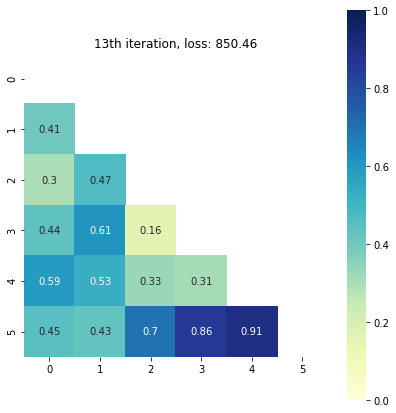

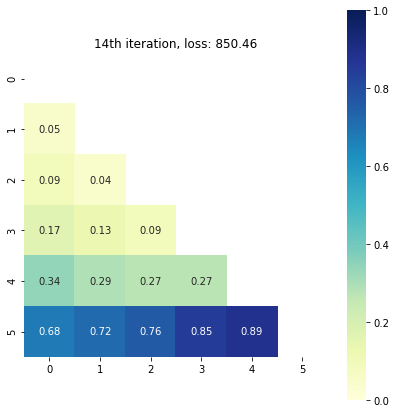

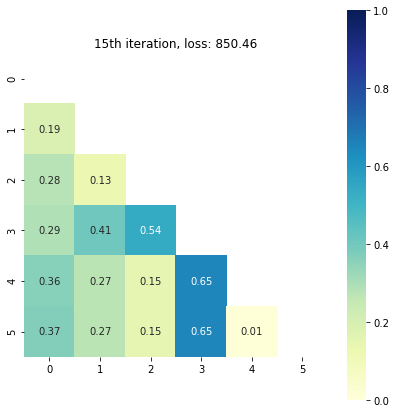

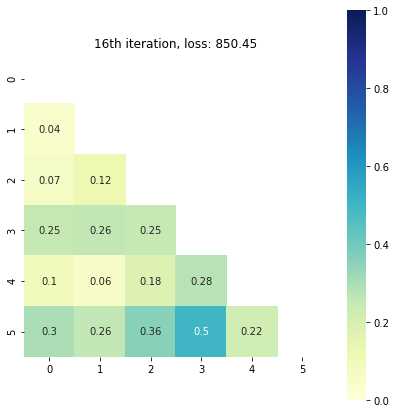

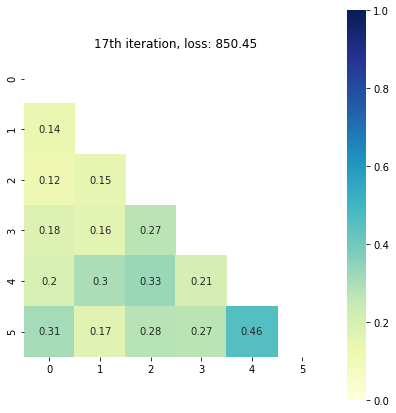

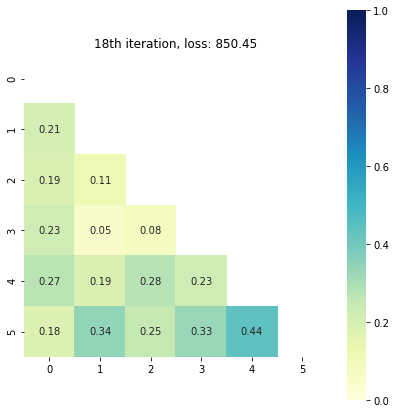

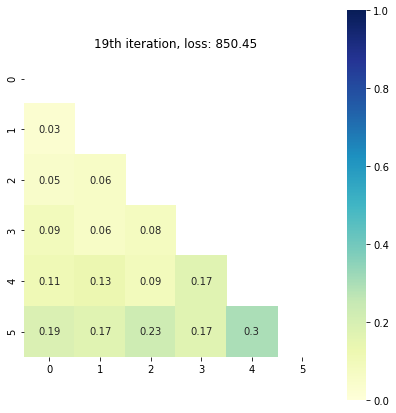

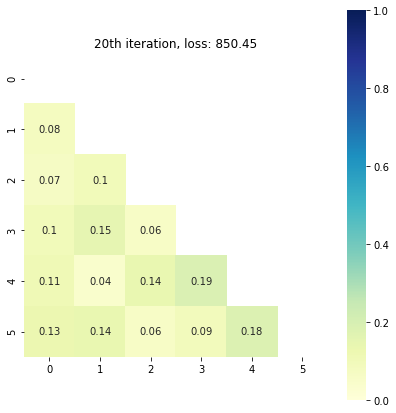

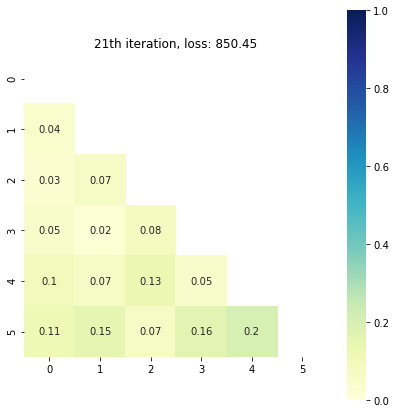

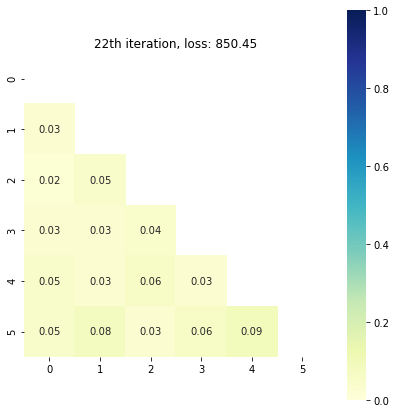

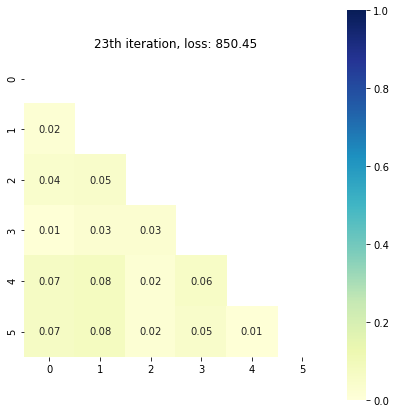

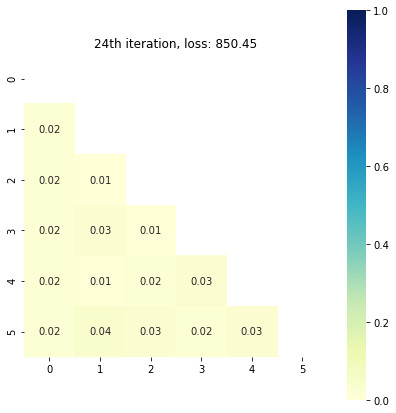

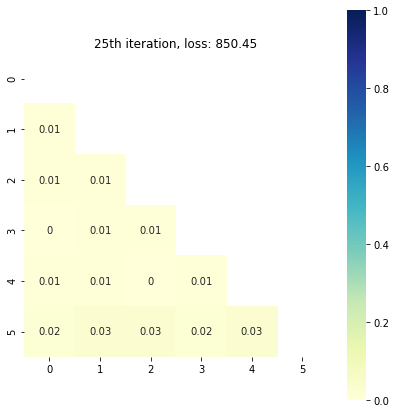

In [23]:
n = int(argss.shape[0])
for i in range(n-1):
    figure, ax = plt.subplots(figsize=(6, 6))
    figure.tight_layout()
    ax.set_title("%dth iteration, loss: %.2f"%(i+1, valss[i].round(2)))
    axsns = sns.heatmap(distn[i+1], mask=mask, vmin=0, vmax=1, ax=ax, annot=True, square=True,  cmap="YlGnBu")
    #axsns.set_xticklabels(stats['val'][i+1].round(2))
    #axsns.set_yticklabels(stats['val'][i+1].round(2))

In [ ]:
# 1 optimiser
np.random.seed(294)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 10,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es(dim=2)
optParas ={'x0': torch.randn(2).cuda()*10,
           'std': torch.ones((2,)).cuda() * 3, 
           'tol': 1e-2, 
           'adjust_func': inner_opt, 
           'record': False, 
           'max_iter': 30,
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()